In [7]:
#!pip install --upgrade numpy
#!pip install --upgrade pandas
#!pip install seaborn
#!pip install joblib
#!pip install -U scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
import joblib

from datetime import datetime
from datetime import timedelta

pd.set_option('use_inf_as_na', True)
pd.set_option('display.max_columns', None)
warnings.simplefilter("ignore", UserWarning)

#np.seterr('raise')
#np.seterr(divide = 'ignore') 

from sklearn import preprocessing

C:\Users\letic\AppData\Local\Temp\ipykernel_26480\1868077685.py:19: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)


In [23]:
path = "data_wdo\\"

#timeframe = ""
versao='data11'
filename = "WDO_DATASET_normas_"+versao+".csv"
df = pd.read_csv(path+filename, sep=';',encoding='utf-8')

df.columns = ['id','datetime','decisao','ampmedia','tp','sl','stdDev_buffer_0','stdDev_buffer_1','iTrades','dDifPrecoCum','dDifVolCum','dDifVolCum_div_iTrades','dVol','iATR_buffer_0','dDifLastAsk1','dDifLastBid1','dBid','dAsk','dMedDifVolCum','dAvgDifVolCum','dStdDifVolCum','dMaxDifVolCum','dMinDifVolCum','dAmpDifVolCum','dAssDifVolCum','dCurDifVolCum','dMedDifPrecoCum','dAvgDifPrecoCum','dStdDifPrecoCum','dMaxDifPrecoCum','dMinDifPrecoCum','dAmpDifPrecoCum','dAssDifPrecoCum','dCurDifPrecoCum','dMedTrades','dAvgTrades','dStdTrades','dMaxTrades','dMinTrades','dAmpTrades','dAssTrades','dCurTrades','dMedOfMedDifVolCum','dMedOfCurDifVolCum','dMedOfAssDifVolCum','dMedOfMedDifPrecoCum','dMedOfCurDifPrecoCum','dMedOfAssDifPrecoCum','dMedOfMedTrades','dMedOfCurTrades','dMedOfAssTrades','tat_iQtdeBuy','tat_iQtdeSell','tat_iQtdeBalance','tat_dSumBalance','tat_dCurtoseQC','tat_dCurtoseQV','tat_dPMedPondC','tat_dPMedPondV','dMedTaTQtdeBuy','dMedTaTQtdeSell','dMedTaTQtdeBalance','dMedTaTSumBalance','dMedTaTCurtoseQC','dMedTaTCurtoseQV','dMedTaTAssimetriaQC','dMedTaTAssimetriaQV','dMedTaTPMedPondC','dMedTaTPMedPondV','dAvgTaTQtdeBuy','dAvgTaTQtdeSell','dAvgTaTQtdeBalance','dAvgTaTSumBalance','dAvgTaTCurtoseQC','dAvgTaTCurtoseQV','dAvgTaTAssimetriaQC','dAvgTaTAssimetriaQV','dAvgTaTPMedPondC','dAvgTaTPMedPondV','dCurTaTQtdeBuy','dCurTaTQtdeSell','dCurTaTQtdeBalance','dCurTaTSumBalance','dCurTaTCurtoseQC','dCurTaTCurtoseQV','dCurTaTAssimetriaQC','dCurTaTAssimetriaQV','dCurTaTPMedPondC','dCurTaTPMedPondV','open','high','low','close','tick_volume','real_volume','dt','hour','minute','second', 'ratioPMedPondC','ratioPMedPondV','ampco','difPMP','difMedPMP','difCurQCQV','difAvgTaTCur','difAvgTaTAss','difAvgTaTPMP','difCurTaTCur','difCurTatAss','difCurTatPMP','ratioCurTaTQtdeSell','ratioCurTaTQtdeBuy','tat_iQtdeBalanceAcum','tat_dSumBalanceAcum','ratio_iQtdeSumAcum','norma_L1','norma_L2','norma_p','norma_L_inf']

#Transform the object to timestamp
df['datetime'] = df['datetime'].apply(lambda x: pd.Timestamp(x))
df['dt'] = df['datetime'] 
df = df.set_index('datetime')

#Eliminando os duplicados
df.drop_duplicates(subset=None, keep='first', inplace=True)

df.sort_index(inplace=True)

df.fillna(0, inplace=True)


In [24]:
df['close_median_10'] = df['close'].rolling(min_periods=1, window=10).median()
df['close_median_5'] = df['close'].rolling(min_periods=1, window=5).median()
df.head()

,id,decisao,ampmedia,tp,sl,stdDev_buffer_0,stdDev_buffer_1,iTrades,dDifPrecoCum,dDifVolCum,dDifVolCum_div_iTrades,dVol,iATR_buffer_0,dDifLastAsk1,dDifLastBid1,dBid,dAsk,dMedDifVolCum,dAvgDifVolCum,dStdDifVolCum,dMaxDifVolCum,dMinDifVolCum,dAmpDifVolCum,dAssDifVolCum,dCurDifVolCum,dMedDifPrecoCum,dAvgDifPrecoCum,dStdDifPrecoCum,dMaxDifPrecoCum,dMinDifPrecoCum,dAmpDifPrecoCum,dAssDifPrecoCum,dCurDifPrecoCum,dMedTrades,dAvgTrades,dStdTrades,dMaxTrades,dMinTrades,dAmpTrades,dAssTrades,dCurTrades,dMedOfMedDifVolCum,dMedOfCurDifVolCum,dMedOfAssDifVolCum,dMedOfMedDifPrecoCum,dMedOfCurDifPrecoCum,dMedOfAssDifPrecoCum,dMedOfMedTrades,dMedOfCurTrades,dMedOfAssTrades,tat_iQtdeBuy,tat_iQtdeSell,tat_iQtdeBalance,tat_dSumBalance,tat_dCurtoseQC,tat_dCurtoseQV,tat_dPMedPondC,tat_dPMedPondV,dMedTaTQtdeBuy,dMedTaTQtdeSell,dMedTaTQtdeBalance,dMedTaTSumBalance,dMedTaTCurtoseQC,dMedTaTCurtoseQV,dMedTaTAssimetriaQC,dMedTaTAssimetriaQV,dMedTaTPMedPondC,dMedTaTPMedPondV,dAvgTaTQtdeBuy,dAvgTaTQtdeSell,dAvgTaTQtdeBalance,dAvgTaTSumBalance,dAvgTaTCurtoseQC,dAvgTaTCurtoseQV,dAvgTaTAssimetriaQC,dAvgTaTAssimetriaQV,dAvgTaTPMedPondC,dAvgTaTPMedPondV,dCurTaTQtdeBuy,dCurTaTQtdeSell,dCurTaTQtdeBalance,dCurTaTSumBalance,dCurTaTCurtoseQC,dCurTaTCurtoseQV,dCurTaTAssimetriaQC,dCurTaTAssimetriaQV,dCurTaTPMedPondC,dCurTaTPMedPondV,open,high,low,close,tick_volume,real_volume,dt,hour,minute,second,ratioPMedPondC,ratioPMedPondV,ampco,difPMP,difMedPMP,difCurQCQV,difAvgTaTCur,difAvgTaTAss,difAvgTaTPMP,difCurTaTCur,difCurTatAss,difCurTatPMP,ratioCurTaTQtdeSell,ratioCurTaTQtdeBuy,tat_iQtdeBalanceAcum,tat_dSumBalanceAcum,ratio_iQtdeSumAcum,norma_L1,norma_L2,norma_p,norma_L_inf,close_median_10,close_median_5
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-09-18 09:03:00,0,0,4.20,50.0,50.0,3.798449,4.690383,108,-0.5,181.0,1.675926,15167.0,5.9,-0.5,0.0,4875.5,4876.0,243.5,497.300000,563.891231,2492.0,44.0,2448.0,1.817557,3.071775,0.0,-0.183333,0.608607,0.5,-2.0,2.5,-1.298592,1.445423,114.0,157.866667,129.372953,594.0,2.0,592.0,1.635436,2.447518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,85,17,68,163.0,6.772210,2.844712,4876.000000,4875.500000,42.5,36.5,10.0,10.0,8.785534,1.491813,2.785115,1.695137,4881.000000,4880.541667,57.333333,91.200000,-33.866667,-173.966667,10.235149,0.0,2.953592,3.181883,4879.720700,4879.399796,1.259458,11.251183,11.860220,6.790754,6.201459,0.0,1.605520,0.936950,-1.029610,-0.984425,4881.5,4882.5,4875.0,4875.5,4499,15167,2023-09-18 09:03:00,9,3,0,1.045899,0.956115,-6.0,0.500000,0.458333,3.927498,0.0,-0.228291,0.320904,0.0,0.668570,-0.045184,8.933355,0.111940,68.0,163.0,2.397059,382.131925,241.002155,212.794026,173.966667,4875.50,4875.50
2023-09-18 09:03:02,1,0,5.32,50.0,50.0,3.809477,3.798449,148,0.5,278.0,1.878378,284.0,5.6,0.0,0.5,4875.5,4876.0,246.5,499.333333,562.954848,2492.0,44.0,2448.0,1.818311,3.084646,0.0,-0.166667,0.620530,0.5,-2.0,2.5,-1.259422,1.293365,116.0,160.400000,128.373808,594.0,2.0,592.0,1.626643,2.481771,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52,43,9,-47.0,4.630148,5.784769,4876.000000,4875.500000,44.0,36.5,10.5,10.0,8.785534,2.168263,2.785115,1.756326,4880.987991,4880.500000,57.800000,91.400000,-33.600000,-174.566667,10.294634,0.0,2.963910,3.201204,4879.551883,4879.223703,1.257807,11.260331,11.855948,6.791021,6.326713,0.0,1.713689,0.942717,-1.300565,-1.273289,4875.5,4876.0,4875.5,4876.0,97,284,2023-09-18 09:03:02,9,3,2,1.021422,0.979028,0.5,0.500000,0.487991,-1.154621,0.0,-0.237294,0.328179,0.0,0.770973,-0.027276,8.952355,0.111702,77.0,116.0,1.506494,335.426089,212.508982,190.556926,174.566667,4875.75,4875.75
2023-09-18 09:03:04,2,0,5.32,50.0,50.0,3.809477,3.798449,98,-0.5,103.0,1.051020,387.0,5.6,-0.5,0.0,4875.5,4876.0,243.5,494.533333,565.787320,2492.0,44.0,2448.0,1.807241,3.031332,0.0,-0.166667,0.620530,0.5,-2.0,2.5,-1.259422,1.293365,116.0,161.066667,127.982470,594.0,2.0,592.0,1.631537,2.511130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36,21,15,37.0,12.634548

In [16]:
filename = "wdo_dataset_data11.csv"
dataset = pd.read_csv(path+filename, sep=';',encoding='utf-8')

del dataset['Unnamed: 0']
del dataset['variable']

#Transform the object to timestamp
dataset['datetime'] = dataset['dt'].apply(lambda x: pd.Timestamp(x))
dataset = dataset.set_index('datetime')

In [17]:
dataset.head()

,dt,year,month,day,hour,minute,second,TP,SL,amp,ampTH,ampTL,pFreq,pPercentil,pTargetSumBalanceAcumBuy,pTargetSumBalanceAcumSell,pRatio,pRatioSum,spread_latency,ampmedia,stdDev_buffer_0,stdDev_buffer_1,dDifVolCum,dVol,iATR_buffer_0,dStdDifVolCum,dMedDifVolCum,iTrades,dAvgTrades,tat_dSumBalanceAcum,tat_iQtdeBalanceAcum,ratio_iQtdeSumAcum,dAvgTaTSumBalance,dMedTaTSumBalance,dMedDifPrecoCum,dAssDifPrecoCum,dAvgTaTQtdeBalance,dMedOfCurDifPrecoCum,op,precoTrade,precoMedian10,precoMedian5,bStop,rv1,rv2,tat_dSumBalanceAcum_goal,tat_iQtdeBalanceAcum_goal,ratio_iQtdeSumAcum_goal,dAvgTaTSumBalance_goal,dMedTaTSumBalance_goal,dMedDifPrecoCum_goal,dAssDifPrecoCum_goal,dAvgTaTQtdeBalance_goal,dMedOfCurDifPrecoCum_goal,dtclose,difTime,precoClose,contracts,result,liq_reais,obs,target
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-09-18 09:39:56,2023-09-18 09:39:56,2023,9,18,9,39,56,1.5,1.5,0,0.0,3.5,0.8,80,1406.0,-1380.0,20,2,0,2.12,1.032857,1.226110,1855.0,6462.0,2.8,427.563760,86.5,318,85.866667,2725.0,563.0,4.840142,179.433333,26.5,0.00,-0.455894,47.633333,-0.799758,vd,4875.5,4874.25,4874.5,False,0,0,-1254.0,-316.0,3.968354,107.633333,10.0,0.0,0.396820,25.633333,-0.017755,2023-09-18 09:40:24,28,4874.0,2,3.0,30.0,win,-1
2023-09-18 10:22:22,2023-09-18 10:22:22,2023,9,18,10,22,22,1.5,1.5,0,1.0,1.0,0.8,80,1406.0,-1380.0,20,2,0,1.36,1.547901,0.960644,303.0,8497.0,1.7,818.170868,294.0,126,148.066667,2958.0,852.0,3.471831,227.700000,43.0,0.00,-0.233817,87.166667,-0.559641,cp,4864.0,4863.50,4864.0,False,0,0,-817.0,-264.0,3.094697,-31.600000,-16.0,0.0,-0.236197,17.766667,-0.516604,2023-09-18 10:22:46,24,4862.5,2,-3.0,-30.0,loss,-1
2023-09-18 10:31:46,2023-09-18 10:31:46,2023,9,18,10,31,46,1.5,1.5,0,1.0,3.0,0.8,80,1406.0,-1380.0,20,2,0,1.52,0.685730,0.548158,2402.0,7723.0,2.3,489.355504,145.5,552,94.600000,1739.0,608.0,2.860197,141.700000,37.0,0.00,-0.011084,50.400000,-1.030716,cp,4862.5,4862.00,4862.0,False,0,0,690.0,276.0,2.500000,205.000000,89.5,0.0,-0.144749,62.966667,-1.115069,2023-09-18 10:32:10,24,4864.0,2,3.0,30.0,win,1
2023-09-18 10:49:32,2023-09-18 10:49:32,2023,9,18,10,49,32,1.5,1.5,0,0.0,3.5,0.8,80,1406.0,-1380.0,20,2,0,1.36,0.779248,0.455069,1708.0,10858.0,2.1,639.400225,66.0,424,103.200000,2519.0,620.0,4.062903,233.366667,14.5,0.00,-0.059433,67.233333,-0.205498,cp,4867.0,4866.00,4866.5,False,0,0,4379.0,1426.0,3.070827,378.733333,30.0,0.0,-0.083624,114.466667,-0.225183,2023-09-18 10:49:38,6,4868.5,2,3.0,30.0,win,1
2023-09-18 10:49:40,2023-09-18 10:49:40,2023,9,18,10,49,40,1.5,1.5,0,0.0,5.5,0.8,80,1406.0,-1380.0,20,2,0,1.36,1.293380,0.455069,2554.0,18666.0,2.5,896.986298,214.5,566,156.600000,2316.0,910.0,2.545055,386.100000,38.0,0.25,-0.159892,125.266667,-0.264913,cp,4869.0,4866.75,4868.0,False,0,0,4153.0,1514.0,2.743065,509.733333,102.5,0.0,0.011180,176.700000,-0.797589,2023-09-18 10:50:08,28,4870.5,2,3.0,30.0,win,1


In [18]:
#Ganhos medios por dia (pontos)
print('Media/Dia (pontos):',dataset.groupby(['day']).sum()['result'].mean())
#Resultado diario
dataset.groupby(['month','day']).sum()['result']

Media/Dia (pontos): 8.16


month  day
9      18      0.0
       19     24.0
       20    -12.0
       21    -12.0
       22     -3.0
       25     18.0
       26    -12.0
       27     42.0
       28    -12.0
       29     -9.0
10     2      21.0
       3       3.0
       4     -12.0
       5       9.0
       6     -12.0
       9     -12.0
       10     -3.0
       11     18.0
       13     24.0
       16     -6.0
       17    -15.0
       18     24.0
       19     15.0
       20      9.0
       23     12.0
       24    -12.0
       25     18.0
       26     30.0
       27     36.0
       30     45.0
11     3     -12.0
       6       0.0
       7       0.0
Name: result, dtype: float64

In [19]:
#Qtdade de trades medios
print('Media/Dia (Trades):',dataset.groupby(['day']).count()['result'].mean())
#Trades por dia
dataset.groupby(['month','day']).count()['result']

Media/Dia (Trades): 17.24


month  day
9      18     12
       19     13
       20      8
       21      2
       22     12
       25     11
       26     11
       27     11
       28      2
       29      5
10     2      25
       3      20
       4       8
       5      16
       6       4
       9       4
       10     18
       11     19
       13     19
       16      7
       17     20
       18     17
       19     26
       20      8
       23     23
       24      2
       25     22
       26     20
       27     21
       30     11
11     3       6
       6       8
       7      20
Name: result, dtype: int64

In [20]:
#Ganhos medios por dia, liquidos (reais)
print('Media/Dia (reais):', dataset.groupby(['day']).sum()['liq_reais'].mean())
print('Soma Total:', dataset.groupby(['day']).sum()['liq_reais'].sum())
#Resultado diario
dataset.groupby(['month', 'day']).sum()['liq_reais']

Media/Dia (reais): 81.6
Soma Total: 2040.0


month  day
9      18       0.0
       19     240.0
       20    -120.0
       21    -120.0
       22     -30.0
       25     180.0
       26    -120.0
       27     420.0
       28    -120.0
       29     -90.0
10     2      210.0
       3       30.0
       4     -120.0
       5       90.0
       6     -120.0
       9     -120.0
       10     -30.0
       11     180.0
       13     240.0
       16     -60.0
       17    -150.0
       18     240.0
       19     150.0
       20      90.0
       23     120.0
       24    -120.0
       25     180.0
       26     300.0
       27     360.0
       30     450.0
11     3     -120.0
       6        0.0
       7        0.0
Name: liq_reais, dtype: float64

<AxesSubplot: xlabel='datetime'>

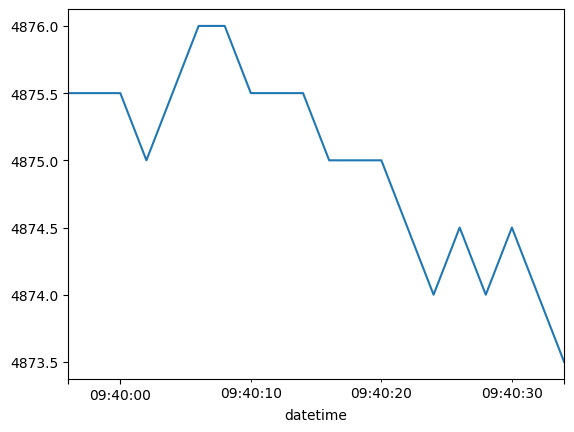

In [21]:
#2023-09-21 17:04:00 inverte
p1 = '2023-09-18 09:39:56'
p2 = '2023-09-18 09:40:34'

rule1 = "dt >= '" + p1 + "' and dt <= '" + p2 + "' "
d = df.query(rule1)
d['close'].plot()